In [1]:
import sklearn 
import pickle
import numpy as np
from lime.lime_tabular import LimeTabularExplainer as ex

# Load hoston-housing dataset from pickle file

In [2]:
pkl_file = open("./model/housing.pkl","rb")
housing = pickle.load(pkl_file)
pkl_file.close()
housing['feature_names']

array(['crime_per_capita', 'zoning_prop', 'industrial_prop',
       'nitrogen_oxide', 'number_of_rooms', 'old_home_prop',
       'distance_from_city_center', 'high_way_access',
       'property_tax_rate', 'pupil_teacher_ratio', 'low_income_prop',
       'lower_status_prop', 'median_price_in_area'], dtype='<U25')

In [9]:
print(housing.feature_names)
len(housing.feature_names)

['crime_per_capita' 'zoning_prop' 'industrial_prop' 'nitrogen_oxide'
 'number_of_rooms' 'old_home_prop' 'distance_from_city_center'
 'high_way_access' 'property_tax_rate' 'pupil_teacher_ratio'
 'low_income_prop' 'lower_status_prop' 'median_price_in_area']


13

In [40]:
print(housing.target.shape)
print(housing.data.shape)
print(housing.data.T.shape)

(506,)
(506, 13)
(13, 506)


# Split train and test Boston housing dataset

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    housing.data, housing.target)

# Create a RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
cat_col = [i for i, col in enumerate(housing.data.T) if np.unique(col).size < 10]
print(cat_col)

[3, 8]


# Explainer

In [32]:
explainer = ex(X_train,
    feature_names=housing.feature_names,
    class_names=['price'],
    categorical_features=cat_col,
    mode='regression')

# Explain the prediction

['crime_per_capita' 'zoning_prop' 'industrial_prop' 'nitrogen_oxide'
 'number_of_rooms' 'old_home_prop' 'distance_from_city_center'
 'high_way_access' 'property_tax_rate' 'pupil_teacher_ratio'
 'low_income_prop' 'lower_status_prop' 'median_price_in_area']


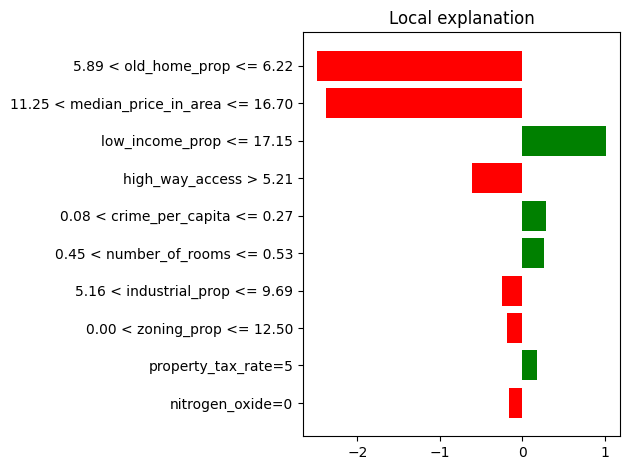

In [39]:
print(housing.feature_names)
# Now explain a prediction
exp = explainer.explain_instance(X_test[25], regressor.predict,
        num_features=10)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [34]:
help(explainer.explain_instance)

Help on method explain_instance in module lime.lime_tabular:

explain_instance(data_row, predict_fn, labels=(1,), top_labels=None, num_features=10, num_samples=5000, distance_metric='euclidean', model_regressor=None) method of lime.lime_tabular.LimeTabularExplainer instance
    Generates explanations for a prediction.
    
    First, we generate neighborhood data by randomly perturbing features
    from the instance (see __data_inverse). We then learn locally weighted
    linear models on this neighborhood data to explain each of the classes
    in an interpretable way (see lime_base.py).
    
    Args:
        data_row: 1d numpy array or scipy.sparse matrix, corresponding to a row
        predict_fn: prediction function. For classifiers, this should be a
            function that takes a numpy array and outputs prediction
            probabilities. For regressors, this takes a numpy array and
            returns the predictions. For ScikitClassifiers, this is
            `classifier.p

In [10]:
print(exp.as_list())

[('6.23 < old_home_prop <= 6.64', -3.8801879351972355), ('median_price_in_area <= 6.79', 3.770506843834244), ('nitrogen_oxide=0', -2.1478867192061237), ('crime_per_capita <= 0.08', 0.6698472699618162), ('329.00 < pupil_teacher_ratio <= 666.00', -0.3351543546732479), ('number_of_rooms <= 0.45', 0.3288989070836754), ('3.33 < high_way_access <= 5.29', -0.30971146376055364), ('distance_from_city_center <= 42.70', 0.30499615541645597), ('16.90 < low_income_prop <= 18.70', 0.11812280687565967), ('391.25 < lower_status_prop <= 396.21', -0.10607177487759196)]


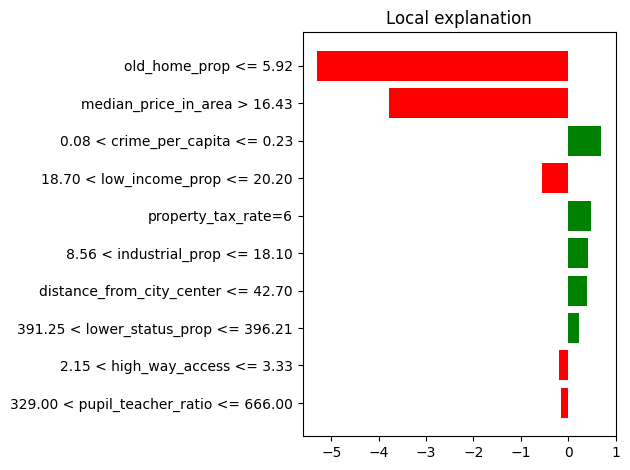

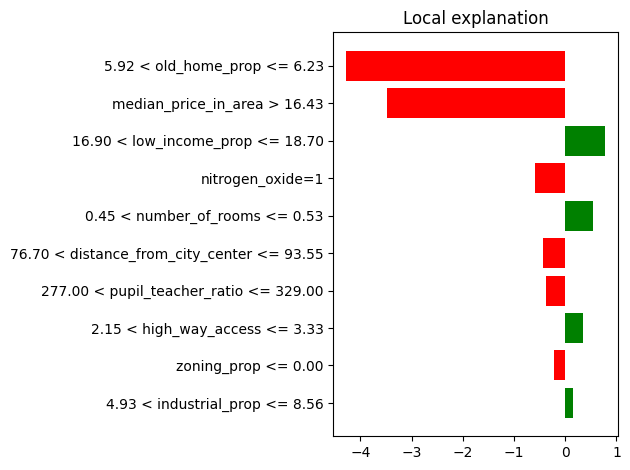

In [12]:
for i in [1, 35]:
    exp = explainer.explain_instance(X_test[i], regressor.predict,
            num_features=10)
    exp.as_pyplot_figure()
    plt.tight_layout()